 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("data-source/whale_returns.csv")

# read the whale returns into the dataframe and set the date column as the index column.
# also treat the index column as a date rather than a string data type
whale_returns = pd.read_csv(whale_data, index_col='Date', parse_dates=True, infer_datetime_format=True)

# sort the index by date order
whale_returns.sort_index(inplace=True)

# display the head of the data
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls and show the total nulls for each column
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Cleaning nulls from DataFrame by dropping them
# Drop nulls
whale_returns = whale_returns.dropna().copy()

# check for null again just to double check the data is clean
# displaying the null counts again
print(whale_returns.isnull().sum())

# visualising the data to ensure the null has gone
# display the head
whale_returns.head()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("data-source/algo_returns.csv")

# read the algo returns into the dataframe and set the date column as the index column.
# also treat the index column as a date rather than a string data type
algo_returns = pd.read_csv(algo_data, index_col='Date', parse_dates=True, infer_datetime_format=True)

# sort the index by date order
algo_returns.sort_index(inplace=True)

# display the head of the data
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Cleaning nulls from DataFrame by dropping them
# Count nulls
# checking for nulls in the algo_returns data set
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
# check for null again just to double check the data is clean
print(algo_returns.isnull().sum())

# show the alog_returns again to ensure it is clean
# display the head of the data
algo_returns.head()

Algo 1    0
Algo 2    0
dtype: int64


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("data-source/sp500_history.csv")

# read the S&P 500 price series into the dataframe and set the date column as the index column.
# also treat the index column as a date rather than a string data type
sp500 = pd.read_csv(sp500_data, index_col='Date', parse_dates=True, infer_datetime_format=True)

# display the head of the data
sp500.head()



,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# checking for nulls 
print("checking for nulls:")
print("---------------------")
print(sp500.isnull().sum())
print("---------------------")
print("data types: ")
# Check Data Types
# Create a DataFrame object
sp500 = pd.DataFrame(sp500, columns=['Date', 'Close'])
sp500.dtypes

checking for nulls:
---------------------
Close    0
dtype: int64
---------------------
data types: 


Date     float64
Close     object
dtype: object

In [10]:
# Fix Data Types
# let's remove the $ symbol from the Close column 
sp500["Close"] = sp500["Close"].str.replace("$", "")

# confirming we have removed the currency symbol
print(sp500["Close"].head())

# check the data type again
print("---------------------")
print("data types: ")
sp500.dtypes

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: object
---------------------
data types: 


Date     float64
Close     object
dtype: object

In [11]:
# close price should not be an object, we need to convert it to a float
# Convert `Close` column from `object` to `float`
sp500["Close"] = sp500["Close"].astype("float")

# check the data type again
print("---------------------")
print("data types: ")
print(sp500.dtypes)
print("")
print("=== close price is now converted from object to float ===")




---------------------
data types: 
Date     float64
Close    float64
dtype: object

=== close price is now converted from object to float ===


In [12]:
# Calculate Daily Returns
sp500_returns= sp500.pct_change()

# Drop the extra date column
sp500_returns.drop(columns=['Date'], inplace=True)
# display the head of the data for the S&P 500
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
print("checking for na: ")
print("===================")
print(sp500_returns.isnull().sum())

# drop the null values
sp500_returns = sp500_returns.dropna()
print("")
print("checking for na after dropping it: ")
print("===================")

# check for null values to ensure it has been dropped
print(sp500_returns.isnull().sum())

checking for na: 
Close    1
dtype: int64

checking for na after dropping it: 
Close    0
dtype: int64


In [14]:
# Rename `Close` Column to be specific to this portfolio.
# renaming "Close" column to "S&P 500"
sp500_returns = sp500_returns.rename(columns={"Close": 'S&P 500'})
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# using the concat function to combine all the portfolios together
all_portfolio_daily_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')

# let's see the data, just to check if it has been correctly combined and the data is correct.
all_portfolio_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and plot the **portfolio** daily returns.

Here, since the combined portfolio is made up of a set of daily returns for each item in the investment pool, We can just go ahead and calculate the portfolio daily returns. <br>

In order to calculate the **daily portfolio returns**, we need to make some assumptions on the weights for each of the investment item in the pool
Let's assume that my investment in the above portfolio are as follows:

|Investment       | distribution     | <img src="./images/spacer.png">    |
| :------------- | :---------- | :----------- |
|  SOROS FUND MANAGEMENT LLC | 3%   |     |
|  PAULSON & CO.INC.  | 4.5% |  |
|  TIGER GLOBAL MANAGEMENT LLC  | 8.5% |  |
|  BERKSHIRE HATHAWAY INC  | 10% |  |
|  Algo 1  | 15% |  |
|  Algo 2  | 23% |  |
|  S&P 500 | 36% |  |





In [16]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.03, 0.045, 0.085, 0.10, 0.15, 0.23, 0.36 ]

portfolio_returns = all_portfolio_daily_returns.dot(weights)

# let's see what the portfolio returns look like
portfolio_returns.head()

Date
2015-03-03    0.000116
2015-03-04   -0.000744
2015-03-05    0.007204
2015-03-06   -0.007223
2015-03-09    0.006233
dtype: float64

<AxesSubplot:xlabel='Date'>

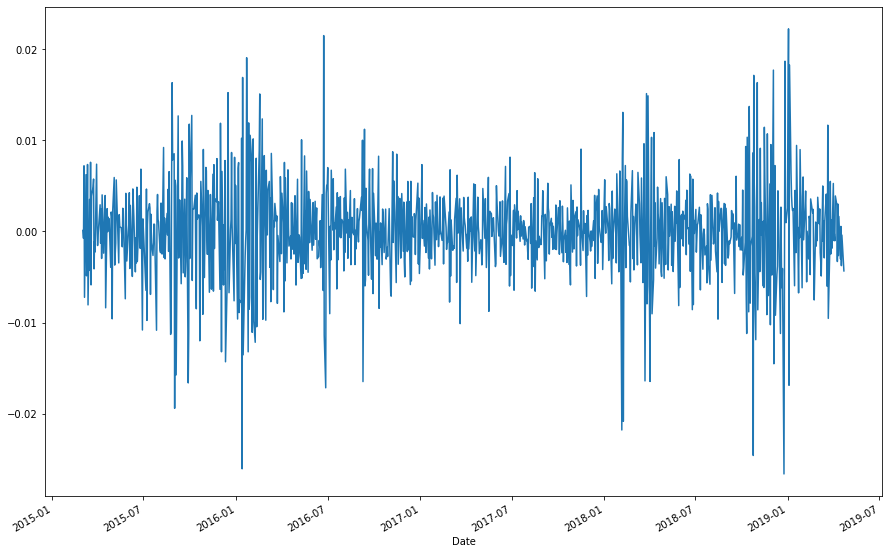

In [17]:
# now let's plot this...

# Use the `plot` function to plot the daily portfolio returns
# Plot daily returns of the combined portfolio above
# also  set the size of the plot to the desired dimension
portfolio_returns.plot(figsize=(15,10))

#### Calculate and plot the **Portfolio** cumulative returns.

Date
2015-03-03    0.000116
2015-03-04   -0.000628
2015-03-05    0.006571
2015-03-06   -0.000699
2015-03-09    0.005530
dtype: float64


<AxesSubplot:xlabel='Date'>

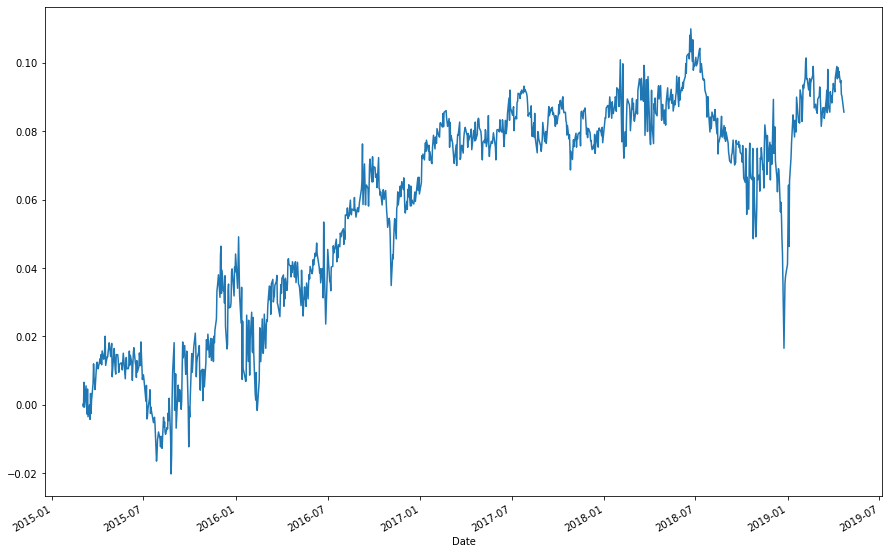

In [18]:
# Calculate cumulative returns of all portfolios
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# let's see how the returns look
print(cumulative_returns.head())


# Plot cumulative returns
# Use the `plot` function to plot the cumulative portfolio returns
# also  set the size of the plot to the desired dimension
cumulative_returns.plot(figsize=(15,10))

#### Calculating and Plotting the daily returns for **each item in the portfolio**.
The above calculations and graph shows the combined return and cumulative returns for the entire investment pool.<br>
Here we will show the return and cumulative return for each of them separately.

Text(0.5, 1.0, 'Daily Returns for Each Item In the Investment Pool')

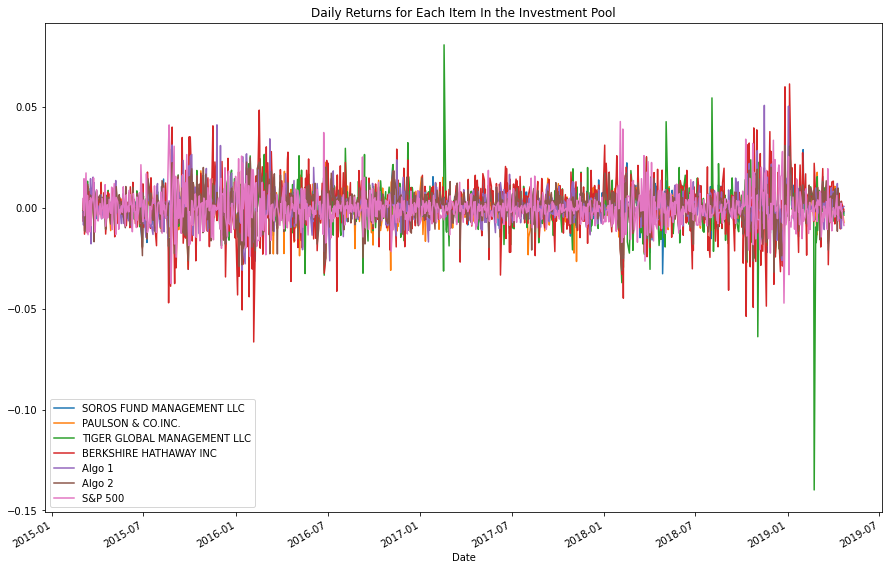

In [19]:
# using the plot function to plot each individual returns in the portfolio
# sizing the plot to 15 x 10 dimension
all_portfolio_daily_returns.plot(figsize=(15,10))

# set the title for the plot
plt.title("Daily Returns for Each Item In the Investment Pool")

In [20]:
# Calculating the daily cumulative returns for each investment in the pool
# to calculate the cumulative returns for each investment, we must first cumulatively add the daily returns for each investment 
# then plot it. We can do this using the cumsum method.

daily_cumulative_returns = all_portfolio_daily_returns.cumsum(axis = 0)
daily_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000964,-0.001739,-0.003030,-0.002356,-0.010531,0.001467,0.003213
2015-03-05,0.004980,0.002337,-0.000675,0.004371,-0.011486,0.005790,0.017591
2015-03-06,-0.002925,-0.001237,-0.009156,-0.008727,-0.016443,-0.005670,0.013662
2015-03-09,-0.002343,0.002988,-0.003313,-0.010380,-0.021890,-0.004367,0.030916


---

Text(0.5, 1.0, 'Cumulative Returns for Each Investment in the Pool')

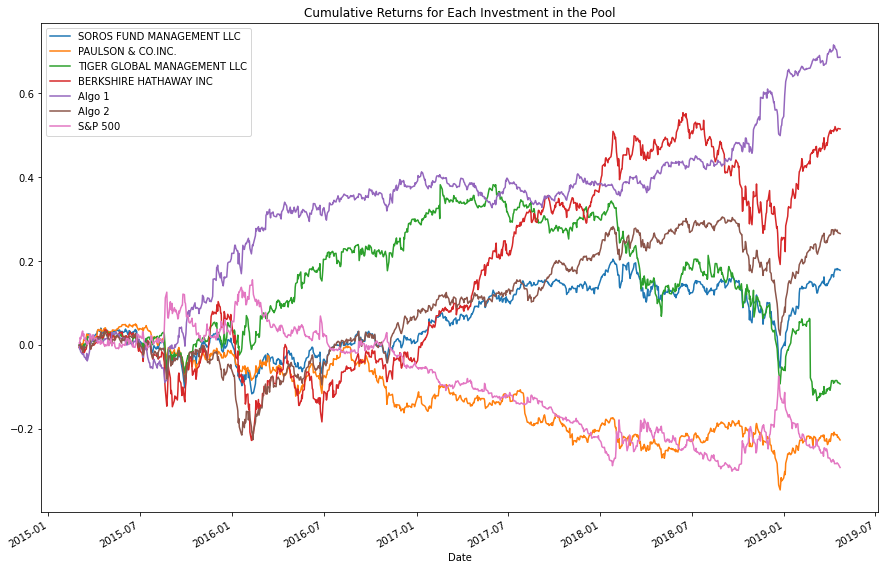

In [21]:
# now we plot the cumulative returns above for each investment...

# using the plot function to plot the cumulative returns for each item in the investment pool
# sizing the plot to 15 x 10 dimension
daily_cumulative_returns.plot(figsize=(15,10))

# set the title for the plot
plt.title("Cumulative Returns for Each Investment in the Pool")

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Box Plot'}>

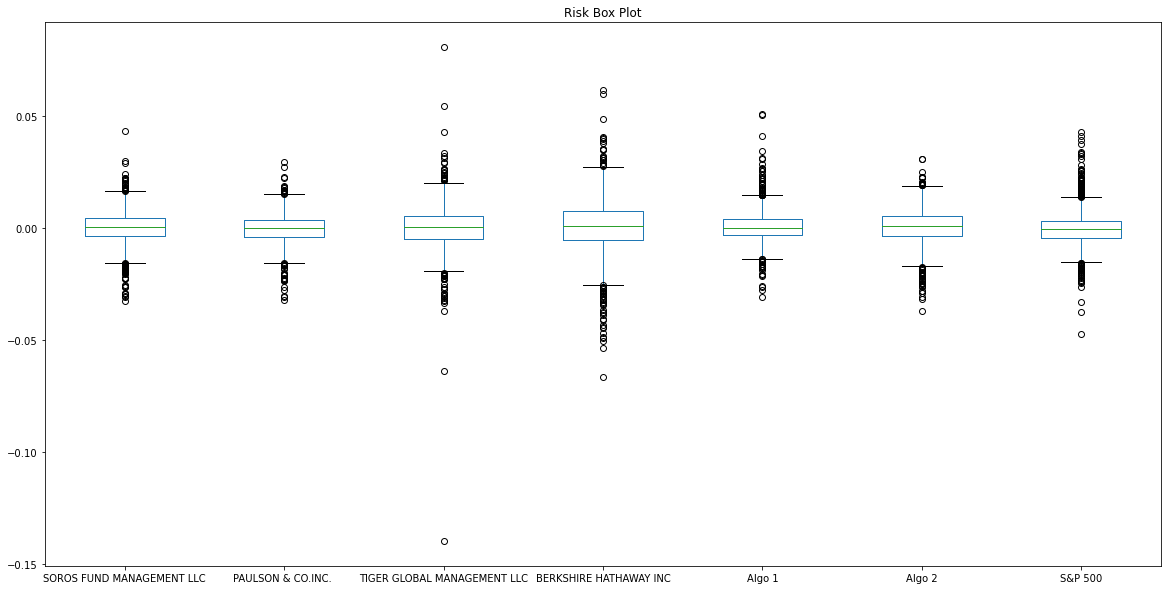

In [22]:
# Box plot to visually show risk

# to create the box plot for each we can just use the plot.box() function on the daily returns
# Plot box plot
# set plot size to 25 x 10 to have a nicely evenly spaced plot
# below command is the samething: 
# all_portfolio_daily_returns.plot.box(figsize=(25,10))

# using this method to produce the boxplot instead:
# Plotting Risk using Daily Returns...
all_portfolio_daily_returns.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


From the boxplot above, we can visually see quite clearly that both **TIGER GLOBAL MANAGEMENT LLC** and **BERKSHIRE HATHAWAY INC** is riskier than the **S&P 500** <br>
as they both have a larger range and a greater positive and negative outlier.

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
# we do this using the std() function:

# Daily Standard Deviations
all_daily_std = all_portfolio_daily_returns.std()

# sorting from lowest to highest
all_daily_std.sort_values(inplace=True)

#display the result
all_daily_std.head()

PAULSON & CO.INC.            0.007026
Algo 1                       0.007623
SOROS FUND MANAGEMENT LLC    0.007896
Algo 2                       0.008341
S&P 500                      0.008587
dtype: float64

### Calculate the Annualized Standard Deviation

In [24]:
# Calculating the annualized std dev for each item in the portfolio pool individually ...
# Calculate the annualized standard deviation (252 trading days)
all_std_annualised = all_daily_std * np.sqrt(252)

# let's sort this from lowest to highest risk
all_std_annualised.sort_values(inplace=True)
all_std_annualised

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

### Determine which portfolios are riskier than the S&P 500

As stated previously above, we could visually tell that both **TIGER GLOBAL MANAGEMENT LLC** and **BERKSHIRE HATHAWAY INC** is riskier than the **S&P 500** <br>
Using the calculated annualised standard deviation in the previous step, we can also confirm this. With both having an annualised standard deviation of 0.17 and 0.2 <br>
which is well above that the S&P 500 with a value 0.13, it is clear these two portfolio are riskier than the S&P 500.

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day Standard Deviation'}, xlabel='Date'>

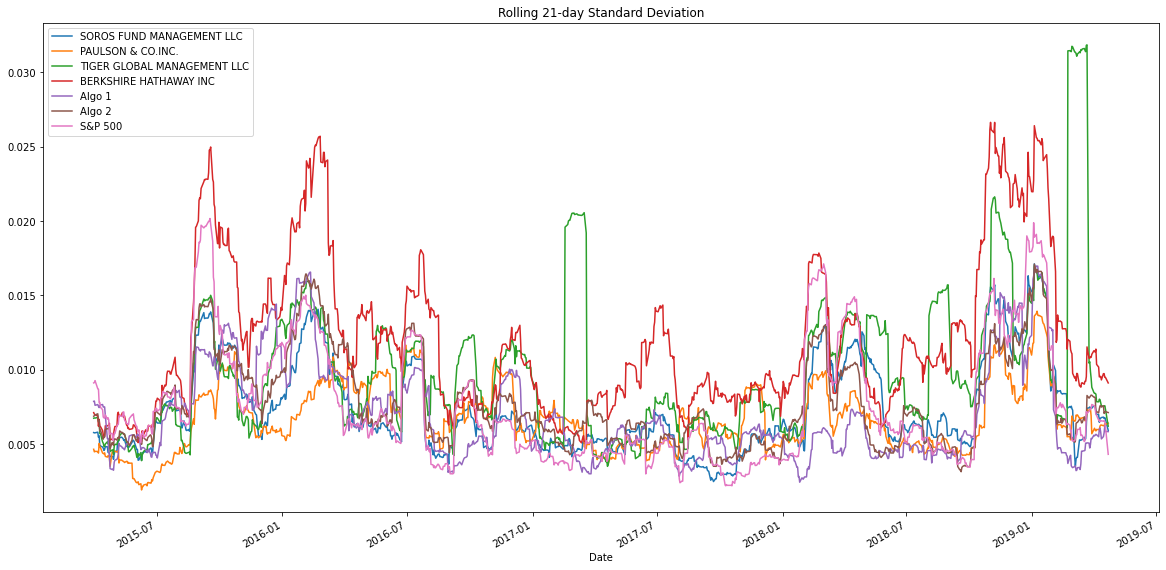

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# set window to 21 for a rolling 21 day calculation
rolling_21day_std = all_portfolio_daily_returns.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_21day_std.plot(figsize = (20,10), title = "Rolling 21-day Standard Deviation")

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
# Using the `corr` function to calculate correlations for each item in the investment pool:
portfolio_correlation = all_portfolio_daily_returns.corr()

# Display de correlation matrix
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


#### Plotting the correlation heatmap:

<AxesSubplot:>

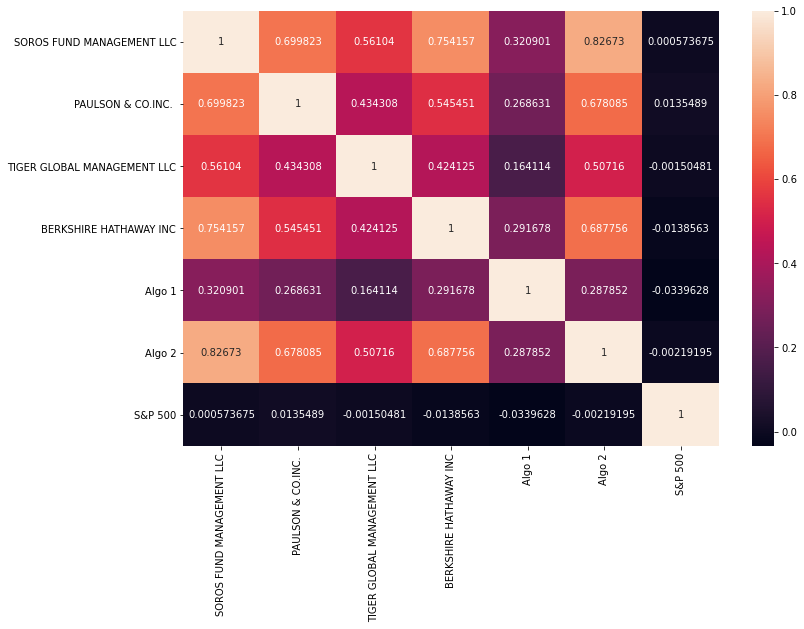

In [27]:
# Create a heatmap from the correlation values
# setting the size
plt.figure(figsize = (12,8))

# produce the heatmap
sns.heatmap(portfolio_correlation, annot=True, fmt='g')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio vs S&P 500
sorro_covariance = all_portfolio_daily_returns['SOROS FUND MANAGEMENT LLC'].cov(all_portfolio_daily_returns['S&P 500'])
paulson_co_covariance = all_portfolio_daily_returns['PAULSON & CO.INC. '].cov(all_portfolio_daily_returns['S&P 500'])
tiger_covariance = all_portfolio_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(all_portfolio_daily_returns['S&P 500'])
berkshire_covariance = all_portfolio_daily_returns['BERKSHIRE HATHAWAY INC'].cov(all_portfolio_daily_returns['S&P 500'])
algo1_covariance = all_portfolio_daily_returns['Algo 1'].cov(all_portfolio_daily_returns['S&P 500'])
algo2_covariance = all_portfolio_daily_returns['Algo 2'].cov(all_portfolio_daily_returns['S&P 500'])
sp500_covariance = all_portfolio_daily_returns['S&P 500'].cov(all_portfolio_daily_returns['S&P 500'])

To go a little deeper, instead of manually calculating the covariance of each one separately like above, we could <br>
produce a covariance matrix and display it as a heatmap similar to the one for the correlation calculations:



In [29]:
# calculating the covariance against each and every combination of investments 
# ( this is statistcally known as the covariance matrix )
covMatrix = pd.DataFrame.cov(all_portfolio_daily_returns)

# show the covariance matrix
covMatrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,6.234980e-05,3.882253e-05,4.827593e-05,0.000077,0.000019,5.445169e-05,3.889727e-08
PAULSON & CO.INC.,3.882253e-05,4.935787e-05,3.325027e-05,0.000050,0.000014,3.973677e-05,8.173659e-07
TIGER GLOBAL MANAGEMENT LLC,4.827593e-05,3.325027e-05,1.187513e-04,0.000060,0.000014,4.609935e-05,-1.408113e-07
BERKSHIRE HATHAWAY INC,7.693074e-05,4.950567e-05,5.970808e-05,0.000167,0.000029,7.411140e-05,-1.537109e-06
Algo 1,1.931508e-05,1.438611e-05,1.363245e-05,0.000029,0.000058,1.830237e-05,-2.223043e-06
Algo 2,5.445169e-05,3.973677e-05,4.609935e-05,0.000074,0.000018,6.957619e-05,-1.569987e-07
S&P 500,3.889727e-08,8.173659e-07,-1.408113e-07,-0.000002,-0.000002,-1.569987e-07,7.373468e-05


displaying the covariance matrix as a heatmap:


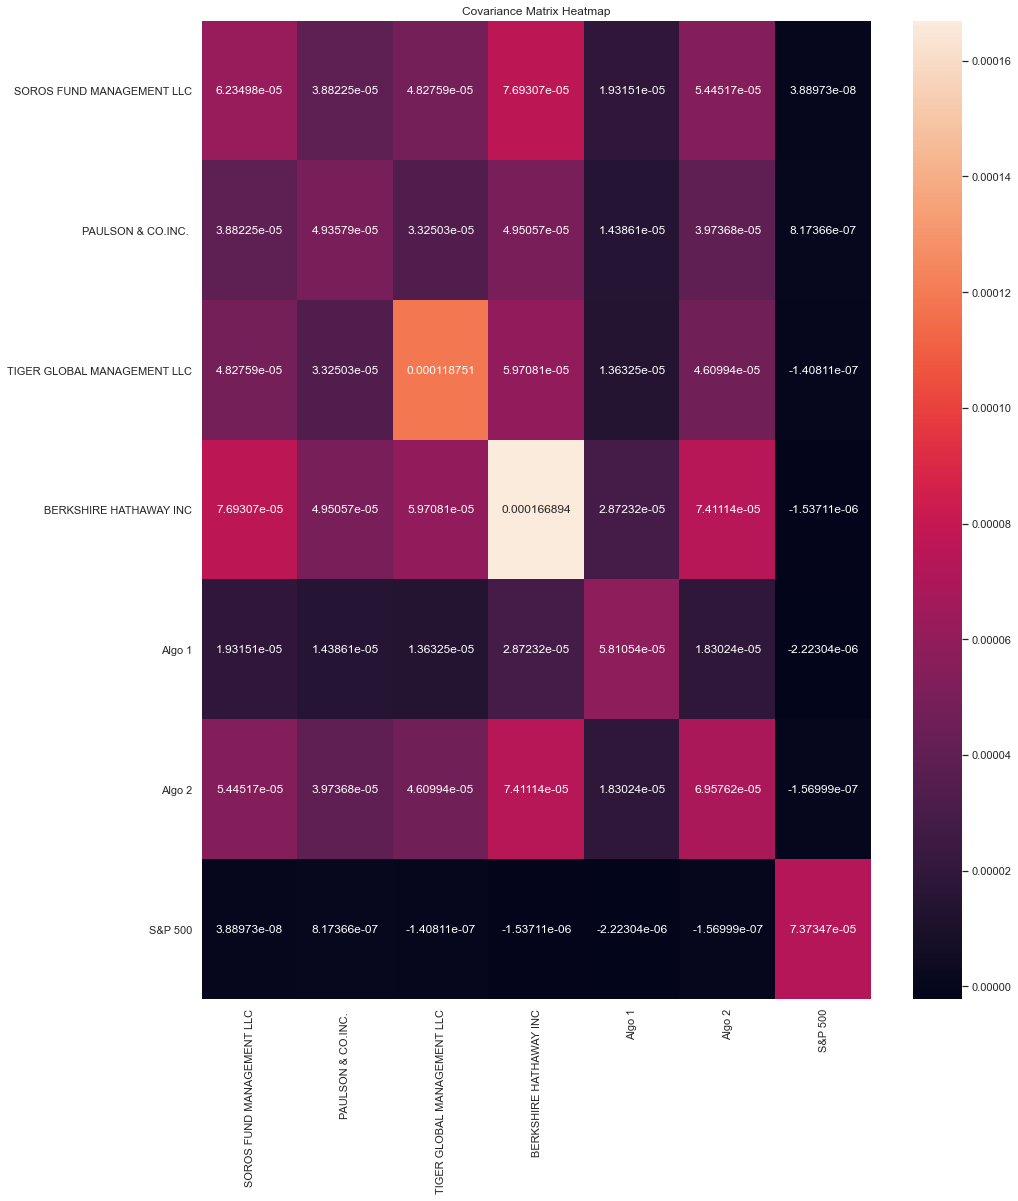

<Figure size 2160x2160 with 0 Axes>

In [36]:
# generate the heatmap for the convariance
sns.heatmap(covMatrix, annot=True, fmt='g')

# setting the title of the matrix
plt.title('Covariance Matrix Heatmap', fontsize = 12)

# just testing out different ways of sizing the covariance matrix
# sns.set(rc = {'figure.figsize':(15,18)})
plt.figure(figsize = (30,30))


# display the matrix
plt.show()

########## THIS PART IS COMMENTED OUT AS IT IS FOR REFRENCE ONLY ... ############
#   JUST FOUND ANOTHER WAY TO DO THE SAME THING AS ABOVE
#   KIND OF AN INTERESTING TECHNIQUE I THOUGHT SO KEEPING IT FOR REFERENCE ONLY
#   ax = plt.axes()
#   sns.heatmap(covMatrix, ax = ax, annot=True, fmt='g')
#   ax.set_title('Covariance Matrix Heatmap')
#   plt.show()
#
#################################################################################



Let's validate that the matrix is correct, looking at the bottom left box (S&P 500 vs SORROS) we can see it has a value of 3.889. <br>
Displaying this value we calculated earlier for the variable **sorro_covariance**, you will see that it should have the same value:


In [37]:
print(f"Covariance for SORROS FUND vs S&P 500 = {sorro_covariance}" )

Covariance for SORROS FUND vs S&P 500 = 3.8897269830640064e-08


This is as expected as shown in the covariance matrix

In [38]:
    
# Calculate variance of S&P 500
sp500_var = all_portfolio_daily_returns['S&P 500'].var()
sp500_var

7.373467552840441e-05

**You should note that the variance of the S&P 500 is the same as the covariance of the S&P 500 against itself (without going through the math, this is a mathematical fact).**

Beta Calculations Against S&P 500:
SORROS FUND: 0.0005275302230855533 | PAULSON CO: 0.011085230859278476 | TIGER: -0.0019097027512372305 | BERKSHIRE: -0.020846489408902644 | ALGO 1: -0.030149214542337766 | ALGO 2: -0.0021292377365872747 | | S&P 500: 1.0


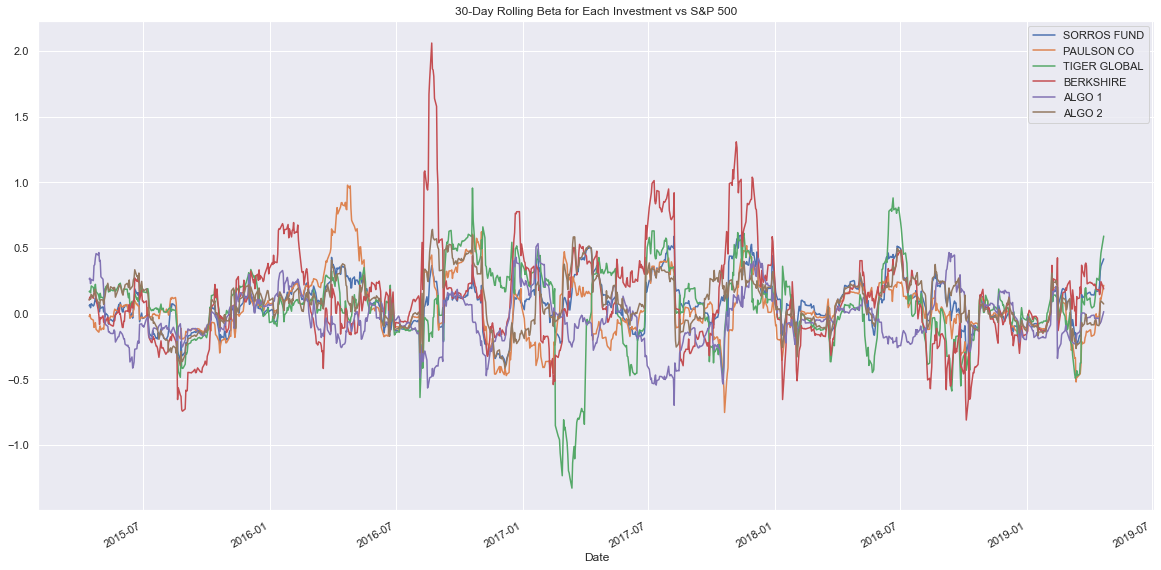

In [39]:
# Computing beta
# Here we could produce a beta matrix as well but since this section is more about comparing each investment against the S&P 500, 
# we will just calculate the beta for each investment in relation to the S&P 500:

# calculating beta...
sorro_beta = sorro_covariance / sp500_var
paulson_co_beta = paulson_co_covariance / sp500_var
tiger_beta = tiger_covariance / sp500_var
berkshire_beta = berkshire_covariance / sp500_var
algo1_beta = algo1_covariance / sp500_var
algo2_beta = algo2_covariance / sp500_var
sp500_beta = sp500_covariance / sp500_var

print("Beta Calculations Against S&P 500:")
print(f"SORROS FUND: {sorro_beta} | PAULSON CO: {paulson_co_beta} | TIGER: {tiger_beta} | BERKSHIRE: {berkshire_beta} | ALGO 1: {algo1_beta} | ALGO 2: {algo2_beta} | | S&P 500: {sp500_beta}")


# Plot beta trend
# To plot the beta trend we need to calculate the 30-Day rolling betas for each investment against the S&P 500:

# calculating the rolling covariance for each investment:
rolling_sorro_covariance = all_portfolio_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(all_portfolio_daily_returns['S&P 500'])
rolling_paulson_co_covariance = all_portfolio_daily_returns['PAULSON & CO.INC. '].rolling(window=30).cov(all_portfolio_daily_returns['S&P 500'])
rolling_tiger_covariance = all_portfolio_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(all_portfolio_daily_returns['S&P 500'])
rolling_berkshire_covariance = all_portfolio_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(all_portfolio_daily_returns['S&P 500'])
rolling_algo1_covariance = all_portfolio_daily_returns['Algo 1'].rolling(window=30).cov(all_portfolio_daily_returns['S&P 500'])
rolling_algo2_covariance = all_portfolio_daily_returns['Algo 2'].rolling(window=30).cov(all_portfolio_daily_returns['S&P 500'])


# Calculating the 30-day rolling variance of S&P 500:
rolling_sp500_variance = all_portfolio_daily_returns['S&P 500'].rolling(window=30).var()

# calculating the 30-day rolling beta for each investment against the S&P 500.. 
rolling_sorro_beta = rolling_sorro_covariance / rolling_sp500_variance
rolling_paulson_co_beta = rolling_paulson_co_covariance / rolling_sp500_variance
rolling_tiger_beta = rolling_tiger_covariance / rolling_sp500_variance
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_sp500_variance
rolling_algo1_beta = rolling_algo1_covariance / rolling_sp500_variance
rolling_algo2_beta = rolling_algo2_covariance / rolling_sp500_variance


# plotting the beta trend...
# set the figure for the first beta item - sorro_beta
ax = rolling_sorro_beta.plot(figsize=(20, 10), title='30-Day Rolling Beta for Each Investment vs S&P 500')

# add the rolling beta for other investments to the same figure:
rolling_paulson_co_beta.plot(ax=ax)
rolling_tiger_beta.plot(ax=ax)
rolling_berkshire_beta.plot(ax=ax)
rolling_algo1_beta.plot(ax=ax)
rolling_algo2_beta.plot(ax=ax)


# Set the legend of the figure
ax.legend(["SORROS FUND", "PAULSON CO", "TIGER GLOBAL", "BERKSHIRE", "ALGO 1", "ALGO 2"])



The plot of the **Rolling Beta** above tells us about the volatility of the portfolio. A beta of 1 indicates that the security's price tends to move 
with the market (S&P 500); a beta greater <br>than 1 indicates that the security's price tends to be more volatile than the market; a beta of less than 1 means 
it tends to be less volatile than the market. We see that in general, <br>the **Sorros Fund** tend to be less volatile than the overall market, staying at a 
rolling beta of less than 1 over the entire period. This indicates that the portfolio (Sorros Fund) is not <br> 
sensitive to movements in the S&P 500. This is in line with the calculations we saw above, in which the Soros Fund was on the low-end of standard deviation scores.<br>

The plot above also shows that **Berkshire** is one of the most volatile investment in our portfolio and supports our previous conclusion that it is riskier than the S&P 500.



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Moving Average (EWMA) - HalfLife:21 days'}, xlabel='Date'>

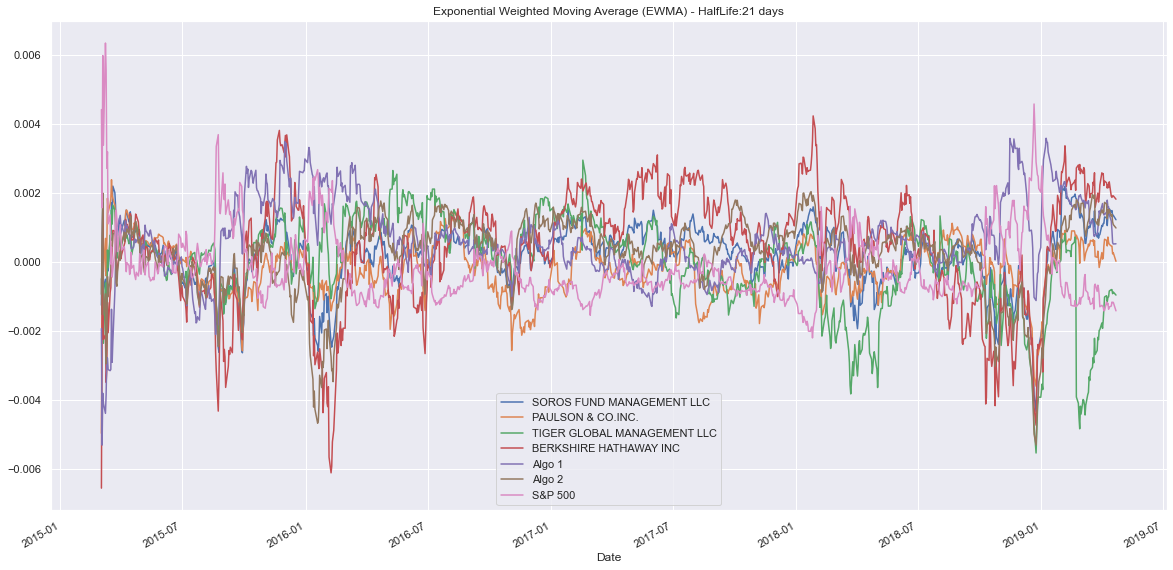

In [40]:
# Use `ewm` to calculate the rolling window
# setting half-life parameter to 21
ewm_daily_returns = all_portfolio_daily_returns.ewm(halflife = 21).mean()

# show the Exponential Weighted Average for each investment
ewm_daily_returns.head()

# lets plot this to see what it looks like
ewm_daily_returns.plot(figsize=(20, 10), title='Exponential Weighted Moving Average (EWMA) - HalfLife:21 days')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Annualized Sharpe Ratios
# Calculating the annualised sharpe ratio
sharpe_ratios = (all_portfolio_daily_returns.mean() * 252) / (all_daily_std * np.sqrt(252))

# sort the sharp ratios from highest to lowest
sharpe_ratios.sort_values(ascending=False, inplace=True)

# display the ratios
sharpe_ratios

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Each Investment in the Pool'}>

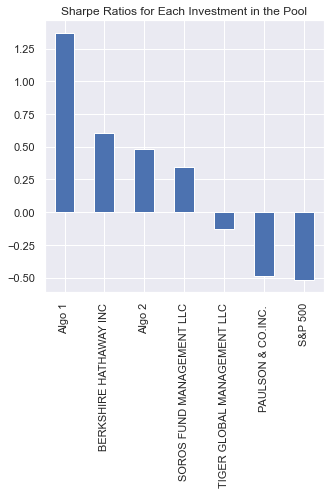

In [42]:
# Visualize the sharpe ratios as a bar plot
# plotting the sharp ratios...

#change the figure dimension
plt.figure(figsize = (5,5))

# show the plot
sharpe_ratios.plot.bar(title='Sharpe Ratios for Each Investment in the Pool')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In evaluating whether or not the algorithmic strategies outperformed the **S&P 500** and the **whales portfolio**, we calculated the average daily returns <br>
for each investment and annualised it. We then divided this value by the annualised daily standard deviation for each investment in the portfolio.<br>
The final result measures the return per unit of risk for each investment in the pool. This ratio is also called the **sharp ratio** which was calculated in the <br>
previous step. The sharp ratio is a measure of risk-adjusted return. It describes how much excess return you receive for the volatility of holding a risky asset. <br>

The higher this value, the better. From the plot of the sharp ratios above, we can see that **Algo 1** outperformed all other investments. **Algo 2** also performed very well <br>
though it did not do better than Berkshire which is one of the stocks invested in the whales porfolio, overall the algorithmic strategies did perform much better than <br>
the whales portfolio and the S&P 500. The S&P 500 has a sharp ratio of -0.5, it did not do very well at all and was the worst performer in the portfolio.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [43]:
# Reading data from 1st stock
# Re-organise columns
google_data = Path("data-source/goog_historical.csv")
google = pd.read_csv(
    google_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
google.sort_index(inplace=True)
google.head()




,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [44]:
# Reading data from 2nd stock
aapl_data = Path("data-source/aapl_historical.csv")
aapl = pd.read_csv(
    aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
aapl.sort_index(inplace=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [45]:
# Reading data from 3rd stock
# Re-organise columns
cost_data = Path("data-source/cost_historical.csv")
cost = pd.read_csv(
    cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
cost.sort_index(inplace=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [46]:
# Combine all stocks in a single DataFrame
all_custom_portfolio_prices = pd.concat([google, aapl, cost], axis="rows", join="inner")
all_custom_portfolio_prices

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [47]:
# Reset Date index
all_custom_portfolio_prices = all_custom_portfolio_prices.reset_index()

In [48]:
# Reorganize portfolio data by having a column per symbol
all_custom_portfolio_prices = all_custom_portfolio_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_custom_portfolio_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


After loading the data and concatenating them into one dataframe, we can see that all columns are just made up of <br>
a series of closing prices and not returns so we now need to calculate the daily returns for them and assign it to the dataframe:

In [49]:
# Calculate daily returns
all_custom_portolio_returns = all_custom_portfolio_prices.pct_change()

# Drop NAs
all_custom_portolio_returns = all_custom_portolio_returns.dropna()

# Display sample data
all_custom_portolio_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Now that we have the daily returns for our custom portfolio, let's calculate our returns for the custom portfolio based on our weights, assuming we invested our capital equally across each one: 

In [50]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = all_custom_portolio_returns.dot(weights)

# Display sample data
custom_portfolio_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In order for us to compare the returns on our custom portfolio with the performance of the previous portfolio, we need to join them into the same dataframe first:

In [51]:
# Join your returns DataFrame to the original returns DataFrame
# joining the custom portfolio returns with the previous portfolio returns ...
final_portfolio_daily_returns_df = pd.concat([all_portfolio_daily_returns, custom_portfolio_returns], axis='columns', join='inner');

# renaming our custom portfolio column to a more appropriate name
final_portfolio_daily_returns_df.rename(columns={0:"AAPL_GOOG_COST"}, inplace=True)

# displaying the data..
final_portfolio_daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL_GOOG_COST
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [52]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# dropping na: 
final_portfolio_daily_returns_df.dropna()

# let's confirm if our final combined portfolio has any null values:
print(final_portfolio_daily_returns_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
AAPL_GOOG_COST                 0
dtype: int64


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [53]:
# Reworking from the previous calculations we obtain the following:

# Calculate the annualized `std`
# Calculate Daily Standard Deviations and sort it in increasing order.
final_portfolio_daily_std = final_portfolio_daily_returns_df.std().sort_values()


#display the result
print("Final Portfolio Daily Standard Deviation:")
print("----------------------------------------")
print(final_portfolio_daily_std)


Final Portfolio Daily Standard Deviation:
----------------------------------------
PAULSON & CO.INC.              0.007366
Algo 1                         0.008437
Algo 2                         0.008788
SOROS FUND MANAGEMENT LLC      0.009248
S&P 500                        0.009605
AAPL_GOOG_COST                 0.013331
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
dtype: float64


As we saw the first time we ran the Standard Deviation table, Tiger Global Management LLC and Berkshire Hathaway Inc. have higher standard deviations than the S&P 500 and therefore is riskier.<br> 
The output also show the custom portfolio **AAPL_GOOG_COST** having a higher standard deviation than the S&P 500 and therefore is also riskier.

In [54]:
# Calculating the annualized std dev for each item in the portfolio pool individually ...
# Calculate the annualized standard deviation (252 trading days)
final_portfolio_std_annualised = final_portfolio_daily_std * np.sqrt(252)

# show the result
print("Final Portfolio Annualised Standard Deviation:")
print("----------------------------------------")
print(final_portfolio_std_annualised)

Final Portfolio Annualised Standard Deviation:
----------------------------------------
PAULSON & CO.INC.              0.116928
Algo 1                         0.133927
Algo 2                         0.139499
SOROS FUND MANAGEMENT LLC      0.146812
S&P 500                        0.152469
AAPL_GOOG_COST                 0.211627
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day Standard Deviation for Final Porfolio'}>

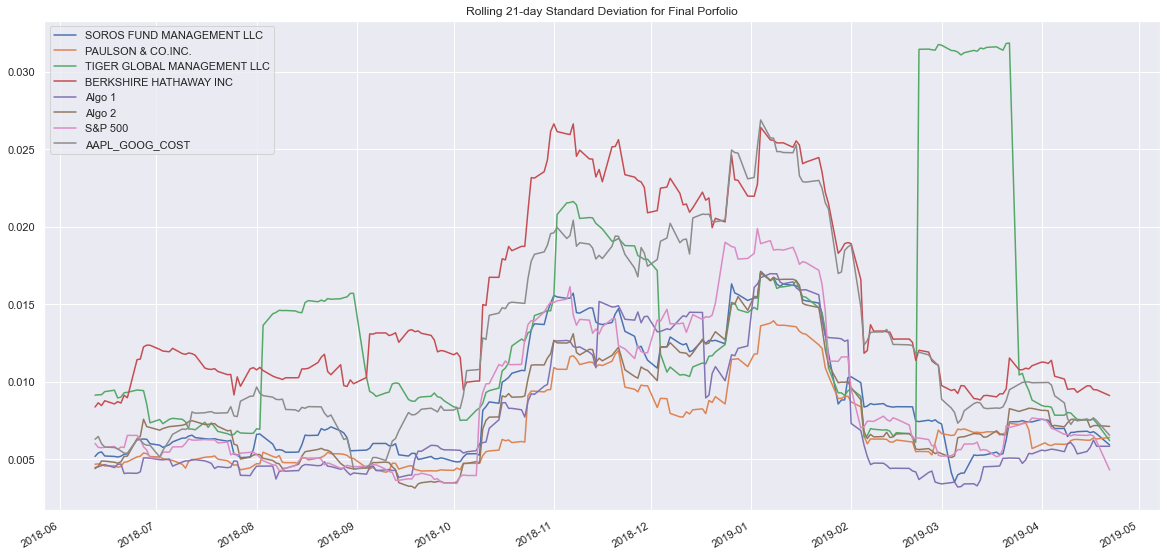

In [55]:

# Calculate the rolling standard deviation for the final portfolios using a 21-day window
# set window to 21 for a rolling 21 day calculation
final_portfolio_rolling_21day_std = final_portfolio_daily_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
final_portfolio_rolling_21day_std.plot(figsize = (20,10), title = "Rolling 21-day Standard Deviation for Final Porfolio")



The first time we ran the 21-Day Rolling Standard Deviation plot, all portfolios tend to see an increase in risk at the same time risk increases in the S&P 500. <br>
However, the magnitude of these increases vary greatly; for instance, Tiger Global Management has a few large spikes in rolling standard deviation, indicating <br>
increased risk, while the S&P 500 only sees slight increases in risk during the same timeframe. The custom portfolio of AAPL_GOOG_COST appears to be on <br>
the high end of the scale, certainly always above the rolling standard deviation of the S&P 500.

### Calculate and plot the correlation

In [56]:
# Calculate and plot the correlation:

# Calculate the correlation
# Using the `corr` function to calculate correlations for each item in the investment pool:
final_portfolio_correlation = final_portfolio_daily_returns_df.corr()

# Display de correlation matrix
final_portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL_GOOG_COST
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
AAPL_GOOG_COST,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


Plotting the correlation matrix we get:


<AxesSubplot:title={'center':'Correlation Matrix for the Combined Final Portfolio'}>

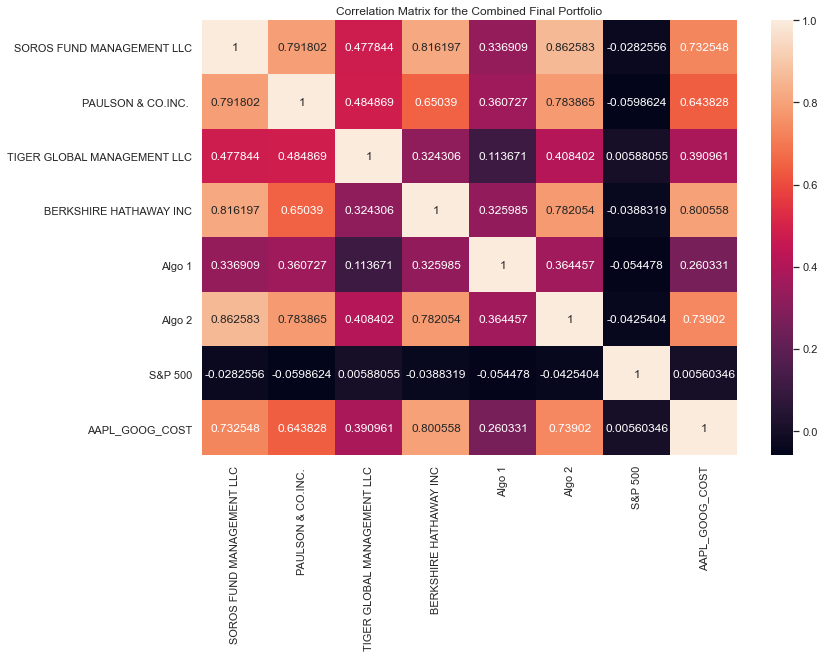

In [57]:
# Create a heatmap from the correlation values


# setting the size
plt.figure(figsize = (12,8))

# setting the title
plt.title('Correlation Matrix for the Combined Final Portfolio', fontsize = 12)

# produce the heatmap
sns.heatmap(final_portfolio_correlation, annot=True, fmt='g')

# Note: another technique we could use to plot something similar could be something like this:
# but I chose the heatmap method as it produces a better presentation. 
# plt.matshow(final_portfolio_correlation.corr())
# plt.xticks(range(len(final_portfolio_correlation.columns)), final_portfolio_correlation.columns)
# plt.yticks(range(len(final_portfolio_correlation.columns)), final_portfolio_correlation.columns)
# plt.colorbar()
# plt.show()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

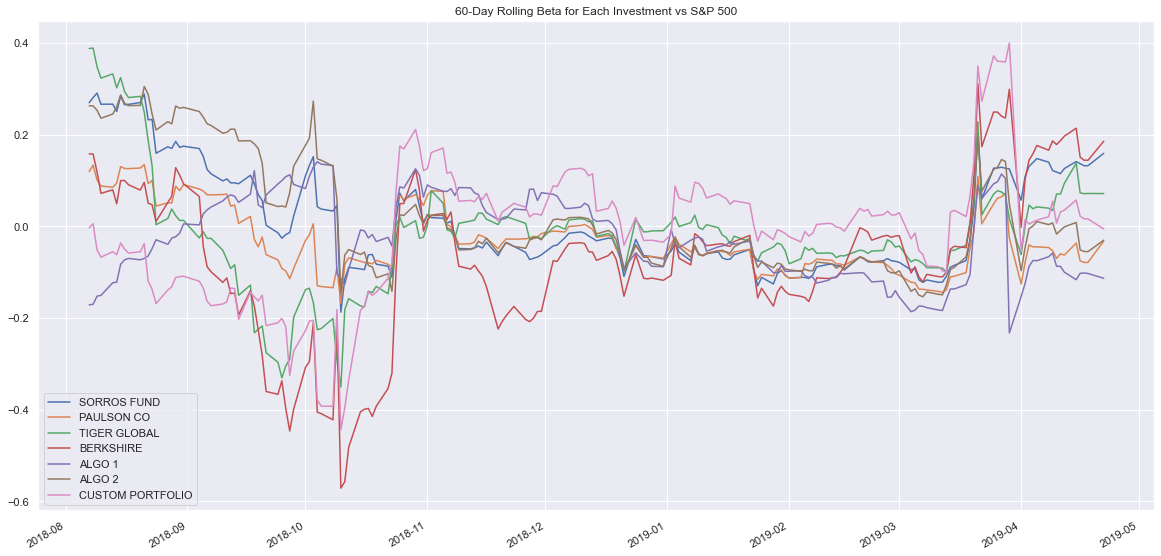

In [58]:
# Calculate and plot Beta

# To plot the Rolling 60-day Beta for the final combined portfolio, we need to calculate the
# 60-Day rolling betas for each investment against the S&P 500 (since we are comparing the portfolio to the S&P 500 ):

# calculating the rolling covariance for each investment:
final_rolling_sorro_covariance = final_portfolio_daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])
final_rolling_paulson_co_covariance = final_portfolio_daily_returns_df['PAULSON & CO.INC. '].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])
final_rolling_tiger_covariance = final_portfolio_daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])
final_rolling_berkshire_covariance = final_portfolio_daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])
final_rolling_algo1_covariance = final_portfolio_daily_returns_df['Algo 1'].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])
final_rolling_algo2_covariance = final_portfolio_daily_returns_df['Algo 2'].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])
final_rolling_custom_covariance = final_portfolio_daily_returns_df['AAPL_GOOG_COST'].rolling(window=60).cov(final_portfolio_daily_returns_df['S&P 500'])


# Calculating the 60-day rolling variance of S&P 500:
final_rolling_sp500_variance = final_portfolio_daily_returns_df['S&P 500'].rolling(window=60).var()

# calculating the 30-day rolling beta for each investment against the S&P 500.. 
final_rolling_sorro_beta      = final_rolling_sorro_covariance / final_rolling_sp500_variance
final_rolling_paulson_co_beta = final_rolling_paulson_co_covariance / final_rolling_sp500_variance
final_rolling_tiger_beta      = final_rolling_tiger_covariance / final_rolling_sp500_variance
final_rolling_berkshire_beta  = final_rolling_berkshire_covariance / final_rolling_sp500_variance
final_rolling_algo1_beta      = final_rolling_algo1_covariance / final_rolling_sp500_variance
final_rolling_algo2_beta      = final_rolling_algo2_covariance / final_rolling_sp500_variance
final_rolling_custom_beta     = final_rolling_custom_covariance / final_rolling_sp500_variance


# plotting the beta trend...
# set the figure for the first beta item - sorro_beta
ax = final_rolling_sorro_beta.plot(figsize=(20, 10), title='60-Day Rolling Beta for Each Investment vs S&P 500')

# add the rolling beta for other investments to the same figure:
final_rolling_paulson_co_beta.plot(ax=ax)
final_rolling_tiger_beta.plot(ax=ax)
final_rolling_berkshire_beta.plot(ax=ax)
final_rolling_algo1_beta.plot(ax=ax)
final_rolling_algo2_beta.plot(ax=ax)
final_rolling_custom_beta.plot(ax=ax)


# Set the legend of the figure
ax.legend(["SORROS FUND", "PAULSON CO", "TIGER GLOBAL", "BERKSHIRE", "ALGO 1", "ALGO 2", "CUSTOM PORTFOLIO"])

#### Plotting Rolling 60-Day Beta for the Custom Portfolio Separately:

<AxesSubplot:title={'center':'Rolling 60-Day Beta for Custom Portfolio (AAPL_GOOG_COST)'}>

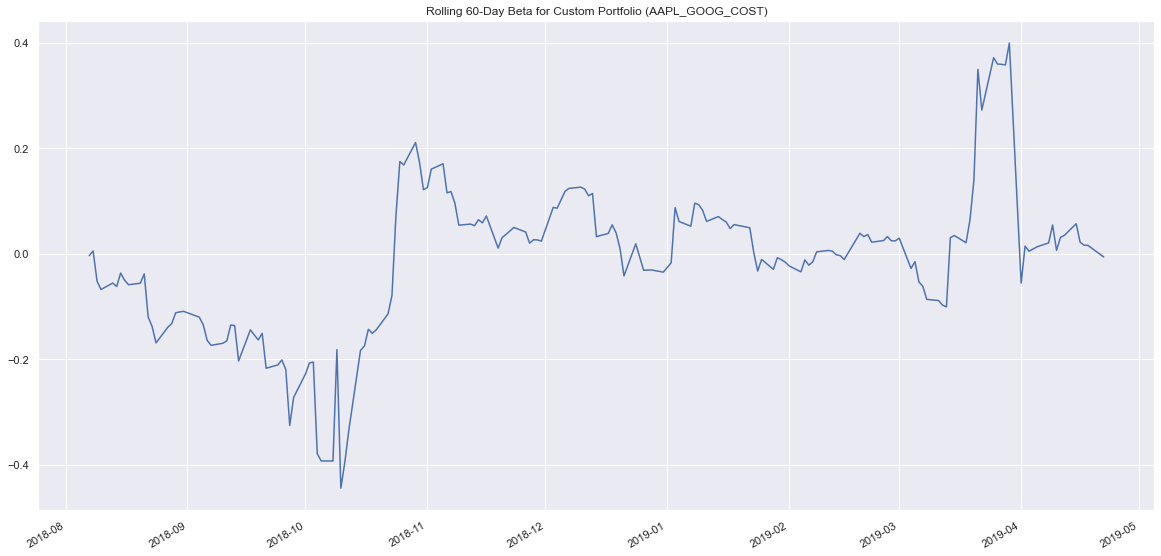

In [59]:
final_rolling_custom_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta for Custom Portfolio (AAPL_GOOG_COST)")

What's interesting here is that with a rolling beta of 60 days as opposed to 30 days, the entire portfolio remained with a beta of less than 1.<br>
Previously, with a 30-day rolling beta, we saw Berkshire to be very volatile with values in excess of 1. Though the Berkshire had a beta of less than 1 over the entire period <br>
its beta still moved around a lot over the period and would be considered relatively and proportionately volatile compared to the others. For our custom porfolio, <br>
during the entire period it remained consistent and stable througout and stayed with in a beta range of 0.4 and -0.4. Overall, with a rolling 60-day beta, all investments <br>
does not appear to be that volatile compared to the market (S&P 500). 

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualzied Sharpe Ratios

# Calculating the annualised sharpe ratio
final_portfolio_sharpe_ratios = (final_portfolio_daily_returns_df.mean() * 252) / (final_portfolio_daily_std * np.sqrt(252))

# sort the sharp ratios from highest to lowest
final_portfolio_sharpe_ratios.sort_values(ascending=False, inplace=True)

# display the ratios
print("Shape Ratios for Final Combined Portfolio")
print("----------------------------------------")
final_portfolio_sharpe_ratios

Shape Ratios for Final Combined Portfolio
----------------------------------------


Algo 1                         2.001260
AAPL_GOOG_COST                 0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
BERKSHIRE HATHAWAY INC         0.103006
Algo 2                         0.007334
S&P 500                       -0.427676
TIGER GLOBAL MANAGEMENT LLC   -1.066635
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Final Combined Portfolio'}>

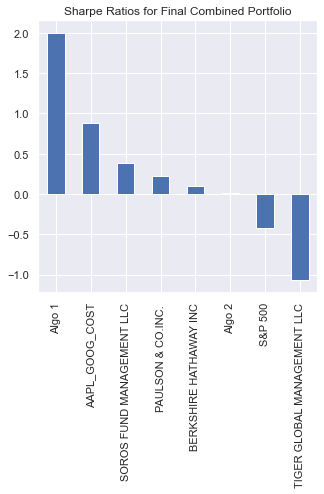

In [61]:
# Visualize the sharpe ratios as a bar plot

# adjust the dimension before displaying the plot
plt.figure(figsize = (5,5))

# show the plot
final_portfolio_sharpe_ratios.plot.bar(title='Sharpe Ratios for Final Combined Portfolio')

### How does your portfolio do?

Based on the result of the Sharpe Ratios, Algo 1 outperformed all investments as a whole. <br>
My chosen custom porfolio **AAPL_GOOG_COST** came in 2nd and well in front of SOROS FUND MANAGEMENT LLC.